## Table of Contents

* [Exploring PCA Analysis](#Chapter1)
    * [Importing Required Libraries 1.1](#section_1_1)
    * [Load Files 1.2](#section_1_2)
    * [PC1 VS PC2 1.3](#section_1_3)
    * [DB Scan Model 1.4](#section_1_4)
    * [Results DataClass 1.5](#section_1_5)
    * [Silhouette Scores 1.6](#section_1_6)
    

## Exploring PCA Analysis <a class="anchor" id="Chapter1"></a>


Given an input PCA, find the correlations among the external variables with the PCA.
Draw inference among the attributes using mutiple methods and determine the clusters 
based on PCA data along with other metrics.


### Importing Required Libraries <a class="anchor" id="section_1_1"></a>

In [2]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import pearsonr
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
from dataclasses import dataclass
from collections import Counter
from sklearn.metrics import silhouette_score


#Input your working directory here
os.chdir('C://Users//usury//Desktop//AROMYX-INTERNSHIP//DS//PC1-PC2')

### Load Files <a class="anchor" id="section_1_2"></a>

In [3]:
'''
    Load the input columns of the PCA analysis. eg: PC1,PC2,PC3... in pcaData.
    Load the external features/ attributes that requires the correlation. eg: fruity, body-rich, etc.
'''

pcaData = pd.read_csv('pcaData.csv')
externalFeatures = pd.read_csv('externalFeatures.csv')

In [4]:
pcaData

,pc1,pc2
0,-0.601950,0.584576
1,-0.053254,-0.023200
2,-0.964375,-0.704537
3,-0.857416,-0.424904
4,-0.767245,-0.699032
5,-0.386508,-0.327904
6,0.059092,-1.000000
7,-0.364680,-0.196879
8,-0.575141,-0.548478
9,-1.000000,-0.420057


In [5]:
externalFeatures

,body_rich,fruity
0,0.00,0.1
1,0.20,-0.8
2,1.00,-0.5
3,-0.30,0.2
4,-0.90,-0.2
5,0.70,-1.0
6,0.40,0.0
7,0.30,0.7
8,0.00,0.6
9,0.90,0.8


### PC1 VS PC2 <a class="anchor" id="section_1_3"></a>

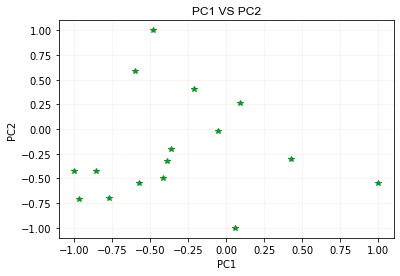

In [6]:
'''
    Plotting the input data as it is to check the clusters visually.
'''

_ = plt.plot(pcaData['pc1'],
             pcaData['pc2'],
             marker='*',
             linewidth=0,
             color='#129128')
_ = plt.grid(which='major', color='#fdddda', alpha=0.45)
_ = plt.title('PC1 VS PC2', family='Arial', fontsize=12)
_ = plt.xlabel('PC1')
_ = plt.ylabel('PC2')
_ = plt.show()

In [7]:
# Normalize data
pcaData1 = pcaData.values.astype('float')
scaledData = StandardScaler().fit(pcaData1)
scaledData1 = scaledData.transform(pcaData1)
scaledData1

array([[-0.54938616,  1.54938453],
       [ 0.51572309,  0.3712609 ],
       [-1.25291426, -0.9494548 ],
       [-1.04528947, -0.40740959],
       [-0.87025248, -0.93878398],
       [-0.13117872, -0.21938273],
       [ 0.73380412, -1.52218504],
       [-0.08880613,  0.03459819],
       [-0.49734564, -0.64694735],
       [-1.32206811, -0.39801288],
       [-0.18930822, -0.54051335],
       [ 0.79553252,  0.92663679],
       [ 0.20614921,  1.19956875],
       [-0.3108993 ,  2.35464876],
       [ 2.56026345, -0.63530799],
       [ 1.44597611, -0.1781002 ]])


### DBSCAN Model <a class="anchor" id="section_1_4"></a>

In [8]:
'''
    DBSCAN: Density-Based Spatial Clustering of Applications with Noise.Finds core samples of high density and expands clusters from them. 
    epsfloat: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    min_samplesint: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

'''
model = DBSCAN(eps=0.65, min_samples=4, metric = 'euclidean').\
fit(scaledData1)

model

DBSCAN(algorithm='auto', eps=0.65, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [9]:
outliers_df = pcaData[model.labels_ == -1]
clusters_df = pcaData[model.labels_ != -1]

In [10]:
model.labels_

array([-1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1],
      dtype=int64)

In [11]:
colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

clusters = Counter(model.labels_)
print(clusters)
print(pcaData[model.labels_ == -1])
print('Number of clusters = {}'.format(len(clusters) - 1))

Counter({-1: 8, 0: 8})
         pc1       pc2
0  -0.601950  0.584576
1  -0.053254 -0.023200
6   0.059092 -1.000000
11  0.090891  0.263310
12 -0.212732  0.404112
13 -0.479092  1.000000
14  1.000000 -0.542474
15  0.425970 -0.306607
Number of clusters = 1


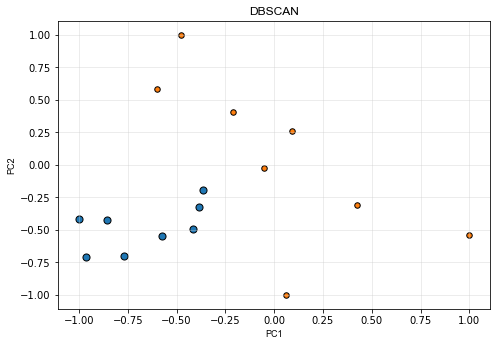

In [12]:
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df[['pc1']], clusters_df[['pc2']], edgecolor='black', s=50)

ax.scatter(outliers_df[['pc1']], outliers_df[['pc2']], edgecolor='black', s=30)

ax.set_xlabel('PC1', family='Arial', fontsize=9)
ax.set_ylabel('PC2', family='Arial', fontsize=9)
plt.title('DBSCAN', family='Arial', fontsize=12)
plt.grid(which='major', color='#cccccc', alpha=0.45)
plt.show()

### Results DataClass <a class="anchor" id="section_1_5"></a>

In [13]:
@dataclass
class Correlationstat:
    PCA: dict()
    Features: dict()

    def result_stat(pcaData, externalFeatures):
        # Creating a new global datafram to hold the results
        global corrdf
        corrdf = pd.DataFrame()
        resultdict = {}

        # Iternating through each of the dataset
        for i in pcaData.columns:
            for j in externalFeatures.columns:
                data1 = pcaData[i]
                data2 = externalFeatures[j]

                # Finding pearsons, spearmans, kendall correlation
                pres, pval = pearsonr(data1, data2)
                sres, sval = stats.spearmanr(data1, data2)
                ktau, kval = stats.kendalltau(data1, data2)

                # Loading the dataframe into a dataframe
                tempdf = pd.DataFrame(
                    data=[[i, j, pres, pval, sres, sval, ktau, kval]],
                    columns=[
                        'Dataset1', 'Dataset2', 'Pearson_Correlation_Coeff',
                        'Pearson_pvalue', 'Spearmans_Correlation_Coeff',
                        'Spearmans_pvalue', 'Kendall_tau', 'Kendall_pvalue'
                    ])
                corrdf = corrdf.append(tempdf)
        corrdf = corrdf.reset_index(drop=True, inplace=False)
        # returning a correlation result dataframe
        return corrdf

    def result(df):

        # Main logic for determining the results based on different types of correlation
        try:
            # Can use any mask variable. ie: Spearmans_pvalue/ Pearson_pvalue/ Kendall_pvalue
            # Checks if the pvalue is less than 0.05
            mask = (df.loc[:, ['Spearmans_pvalue']] < 0.05).values.all()
            # Core filter
            if mask:
                resvar = df.loc[:, [
                    'Dataset1', 'Dataset2', 'Spearmans_Correlation_Coeff'
                ]][mask]
                maxindex = resvar['Spearmans_Correlation_Coeff'].apply(
                    abs).idxmax()
                if df.loc[maxindex, 'Spearmans_Correlation_Coeff'] > 0:
                    return df.loc[maxindex, ['Dataset1', 'Dataset2']]
                else:

                    print('Not able to determine the results')

        except Exception as e:
            print(e)

        try:
            # Determine the result based on max spearmans correlation coefficient.
            resvar = df.loc[:, [
                'Dataset1', 'Dataset2', 'Spearmans_Correlation_Coeff'
            ]]['Spearmans_Correlation_Coeff'].apply(abs).idxmax()
            return df.loc[resvar, ['Dataset1', 'Dataset2']]

        except Exception as e:
            print(e)

    def result_calc(corrdf):
        # Splitting the dataframe according to PC1/PC2
        split_index = len(corrdf) // 2
        df1 = corrdf[0:split_index]
        df2 = corrdf[split_index:len(corrdf)]
        # Getting results for PC1
        r1 = Correlationstat.result(df1)
        # Removing all the rows corresponding to the results obtained in PC1/ eliminate redundancy
        df2 = df2[df2.Dataset2 != r1[1]]
        # Getting results for PC2
        r2 = Correlationstat.result(df2)
        # Returning the results
        return r1[0] + ':' + r1[1], r2[0] + ':' + r2[1]


Correlationstat(pcaData, externalFeatures)

# For final results->Correlationstat.result_calc(corrdf)
# For the result dataframe->Correlationstat.result_stat(pcaData, externalFeatures)

Correlationstat(PCA=         pc1       pc2
0  -0.601950  0.584576
1  -0.053254 -0.023200
2  -0.964375 -0.704537
3  -0.857416 -0.424904
4  -0.767245 -0.699032
5  -0.386508 -0.327904
6   0.059092 -1.000000
7  -0.364680 -0.196879
8  -0.575141 -0.548478
9  -1.000000 -0.420057
10 -0.416454 -0.493570
11  0.090891  0.263310
12 -0.212732  0.404112
13 -0.479092  1.000000
14  1.000000 -0.542474
15  0.425970 -0.306607, Features=    body_rich  fruity
0        0.00     0.1
1        0.20    -0.8
2        1.00    -0.5
3       -0.30     0.2
4       -0.90    -0.2
5        0.70    -1.0
6        0.40     0.0
7        0.30     0.7
8        0.00     0.6
9        0.90     0.8
10      -0.80     0.5
11      -0.20    -0.4
12       0.80     0.3
13      -0.85    -0.9
14      -0.25    -0.8
15      -1.00     1.0)

In [23]:
Correlationstat.result_stat(pcaData, externalFeatures)

,Dataset1,Dataset2,Pearson_Correlation_Coeff,Pearson_pvalue,Spearmans_Correlation_Coeff,Spearmans_pvalue,Kendall_tau,Kendall_pvalue
0,pc1,body_rich,-0.265985,0.319383,-0.216336,0.420966,-0.142261,0.443581
1,pc1,fruity,-0.181350,0.501480,-0.129507,0.632630,-0.092051,0.620071
2,pc2,body_rich,-0.143701,0.595457,-0.095659,0.724534,-0.092051,0.620071
3,pc2,fruity,-0.206782,0.442252,-0.063282,0.815896,-0.041841,0.821714


In [24]:
Correlationstat.result_calc(corrdf)

('pc1:body_rich', 'pc2:fruity')

In [16]:
ins = pd.read_csv('Aromyx_wine list.xlsx - with_descriptions.csv')
ins = ins[[
    'Year', 'Country', 'fruity', 'body-rich', 'Hemisphere', 'SuperRegion'
]]
ins = ins[:16]
ins = ins.drop(13)
ins['index'] = ins.index
ins['SuperRegion'] = ins['SuperRegion'].fillna('Unknown')
ins['pc1'] = pcaData['pc1']
ins['pc2'] = pcaData['pc2']
ins

,Year,Country,fruity,body-rich,Hemisphere,SuperRegion,index,pc1,pc2
0,2017.0,Spain,0.1,0.00,North,Europe,0,-0.601950,0.584576
1,2017.0,France,-0.8,0.20,North,Europe,1,-0.053254,-0.023200
2,2018.0,Chile,-0.5,1.00,South,South,2,-0.964375,-0.704537
3,2018.0,California,0.2,-0.30,North,Unknown,3,-0.857416,-0.424904
4,2018.0,France,-0.2,-0.90,North,Europe,4,-0.767245,-0.699032
5,2018.0,Italy,-1.0,0.70,North,Europe,5,-0.386508,-0.327904
6,2019.0,Argentina,0.0,0.40,South,South,6,0.059092,-1.000000
7,2019.0,France,0.7,0.30,North,Europe,7,-0.364680,-0.196879
8,2019.0,France,0.6,0.00,North,Europe,8,-0.575141,-0.548478
9,2019.0,California,0.8,0.90,North,Unknown,9,-1.000000,-0.420057


### Silhouette scores <a class="anchor" id="section_1_6"></a>

In [17]:
'''
    Silhouette score: means of silhouette coefficient
    An instance's silhouette coefficient is equal to (b-a)/max(a,b) where a is the mean
    distance to the other instances of the same cluster.
'''

def df_groups(data, labels):
    '''
        This function is used to generate multiple groups from the dataset, where the groups are interlinked 
        We have used a condition where the elements in the groups formed should be more than 3 and also should result in 
        a cluster more than 1 in the DBSCAN model.

    '''
    # Creating a df to hold the whole group metrics
    df_group_metrics = pd.DataFrame()
    print('Silhouette Score of PC1 : PC2 is {}'.format(
        silhouette_score(data, labels)))
    tempdf1 = pd.DataFrame(data=[[
        'PC1', 'PC2',
        pd.DataFrame(data), labels,
        silhouette_score(data, labels)
    ]],
                           columns=[
                               'Attribute1', 'Attribute2', 'PCA_DATA',
                               'Model_labels_', 'Silhouette_Score'
                           ])
    df_group_metrics = df_group_metrics.append(tempdf1)

    # Sort by Country/ Region/ Year/ Hemisphere
    filterlist = ['Country', 'SuperRegion', 'Year', 'Hemisphere']
    for filterattribute in filterlist:
        regiondf = ins.groupby([filterattribute])
        for i in regiondf:
            mask = (ins.loc[:, [filterattribute]] == i[0]).values
            if mask.any():
                resvar = ins.loc[:, ['pc1', 'pc2']][mask]
                # The number of groups check
                if len(resvar) >= 3:
                    # DBSCAN Model
                    model1 = DBSCAN(eps=0.65, min_samples=4, metric = 'euclidean').\
                    fit(resvar)
                    # check to see if the number of clusters>2
                    if len(np.unique(model1.labels_)) > 1:
                        sscore = silhouette_score(resvar, model1.labels_)
                        tempdf1 = pd.DataFrame(data=[[
                            filterattribute, i[0],
                            pd.DataFrame(resvar), model1.labels_, sscore
                        ]],
                                               columns=[
                                                   'Attribute1', 'Attribute2',
                                                   'PCA_DATA', 'Model_labels_',
                                                   'Silhouette_Score'
                                               ])
                        df_group_metrics = df_group_metrics.append(tempdf1)
    df_group_metrics = df_group_metrics.reset_index(drop=True, inplace=False)
    resvar = df_group_metrics.loc[:, [
        'Attribute1', 'Attribute2', 'Silhouette_Score'
    ]]['Silhouette_Score'].apply(abs).idxmax()
    return df_group_metrics.loc[resvar, [
        'Attribute1', 'Attribute2', 'Silhouette_Score'
    ]], df_group_metrics

In [18]:
# x: Holds the most qualified result attributes
# y: Holds complete silhouette metrics
x1, y1 = df_groups(scaledData1, model.labels_)

Silhouette Score of PC1 : PC2 is 0.35579116675004546


In [28]:
x1

Attribute1           Country
Attribute2            France
Silhouette_Score    0.389357
Name: 1, dtype: object

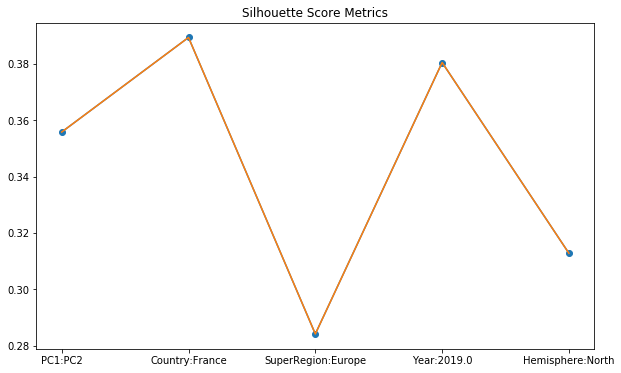

In [20]:
def Visualization(input_df):
    
    xaxis = input_df['Attribute1'].astype(str) + ':' + input_df['Attribute2'].astype(str)
    x = np.array(xaxis.tolist())
    y = np.array(input_df['Silhouette_Score'].values.tolist())
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.plot(y, marker = 'o')
    plt.plot(x, y)
    plt.title('Silhouette Score Metrics')

Visualization(y1)